In [1]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# each point is length, width, type (0, 1)

data = [[3, 1.5, 1],
       [2, 1, 0],
       [4, 1.5, 1],
       [3, 1, 0],
       [3.5, .5, 1],
       [2, .5, 0],
       [5.5, 1, 1],
       [1, 1, 0]]

mystery_flower = [4.5, 1]

In [6]:
# network

#    o   flower type
#   / \  w1, w2, b
#  o   o  length, width, b

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

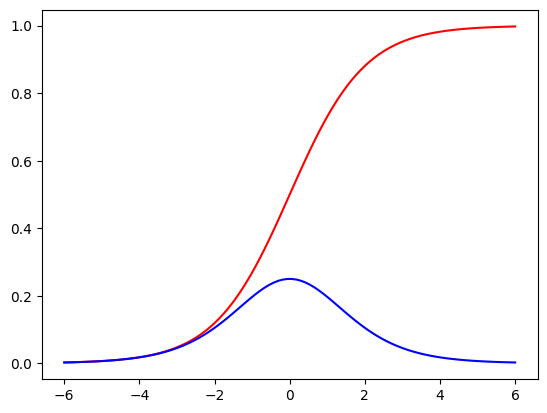

In [9]:
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

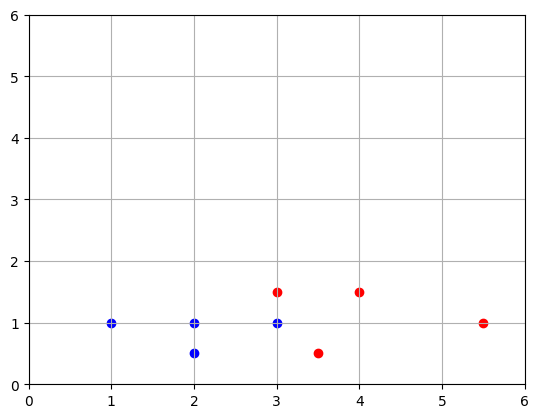

In [9]:
# scatter data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0],point[1], c = color)

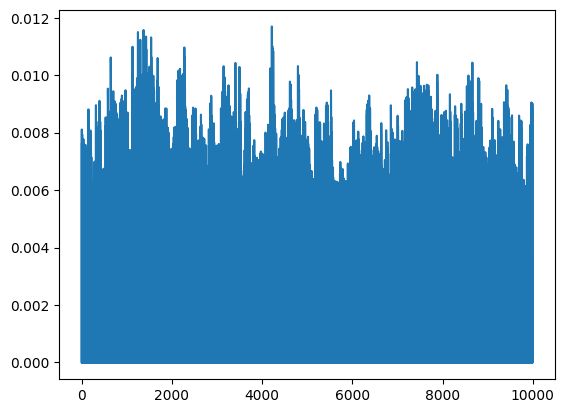

In [18]:
# training loop

learning_rate = 0.2
costs = []

for i in range(10000):
    ri = np.random.randint(len(data))
    point = data[ri]

    # feed forward
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)

    target = point[2]
    # Cost function takes prediction & target and outputs a number
    # The Cost function name is the squared error function
    # We compare the model prediction with the target
    cost = np.square(pred - target)

    costs.append(cost)

    # if i % 1000 == 0:
    #     print(cost)

    # To give us the slope of the cost function at the specific
    # pred value we use the derivative of the cost function
    # We find the slope of the cost wrt each parameter (w1, w2, b)
    dcost_pred = 2 * (pred - target)

    # Bring derivative through sigmoid
    # derivative of sigmoid can be written using more sigmoids!
    # d/dz sigmoid(z) = sigmoid(z)*(1-sigmoid(z))
    dpred_dz = sigmoid_p(z)

    # Need these for our slope calculation
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1

    # We get the partial derivatives using the chain rule
    # Notice the pattern? We're bringing how the cost changes through each function, first through the square
    # then through the sigmoid
    # and finally whatever is multiplying our parameter of interest becomes the last part
    dcost_dz = dcost_pred * dpred_dz

    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db

    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

plt.plot(costs)